In [9]:
#!git clone https://github.com/tGhattas/medical-images-utils.git


In [10]:
#!pip install scikit-image==0.18.1

In [22]:
!ls

__pycache__                    processor.py
final_liver_segmentation.ipynb


In [23]:
import os
from processor import *
from sys import platform
import nibabel as nib
import matplotlib.pyplot as plt
from skimage import data
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [24]:
%matplotlib notebook
# %matplotlib inline

In [25]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [56]:

from datetime import datetime as dt
def multi_slice_viewer(volumes):
    print('8888888888888888------888888888888', dt.now())
    volumes = volumes if isinstance(volumes, list) else [volumes]
    figs = []
    for j in range(len(volumes)):

        fig, axes = plt.subplots(1, 3)
        volume = volumes[j]
        for i in range(3):
            ax = axes[i]
            ax.volume = volume
            ax.index = volume.shape[i] // 2
            where = [slice(-1,1,-1), slice(-1,1,-1), slice(-1,1,-1)]
            where[i] = ax.index
            where = tuple(where)
            ax.imshow(volume[where])
        
#     fig.canvas.mpl_connect('scroll_event', process_key)
#         fig.canvas.mpl_connect('key_press_event', process_key)
#         fig.canvas.draw()
        figs.append(fig)
    return figs if len(figs) > 1 else figs[0]


def select_slice(ax, ind, axis):
    axz = [ax] if not isinstance(ax, list) else ax
    for ax in axz:
        volume = ax.volume
        where = [slice(-1,1,-1), slice(-1,1,-1), slice(-1,1,-1)]
        print('---- ind ', ind)
        ax.index = int(ind) % volume.shape[0]
        print('---- volume.shape ', volume.shape)
        where[axis] = ax.index
        print('---- ax.index ', ax.index)
        where = tuple(where)
        print('---- images len ', len(ax.images))
        print('---- where', where)
        ax.images[0].set_array(volume[where])
        
     
    
def process_key(event):
    fig = event.canvas.figure
    ax = fig.axes[0]
    if event.key == 'j':
        previous_slice(ax)
    elif event.key == 'k':
        next_slice(ax)
    fig.canvas.draw()

def previous_slice(ax):
    """Go to the previous slice."""
    volume = ax.volume
    ax.index = (ax.index - 1) % volume.shape[0]  # wrap around using %
    ax.images[0].set_array(volume[ax.index])

def next_slice(ax):
    """Go to the next slice."""
    volume = ax.volume
    ax.index = (ax.index + 1) % volume.shape[0]
    ax.images[0].set_array(volume[ax.index])
    


8888888888888888------888888888888 2021-03-14 01:47:04.537452


<IPython.core.display.Javascript object>


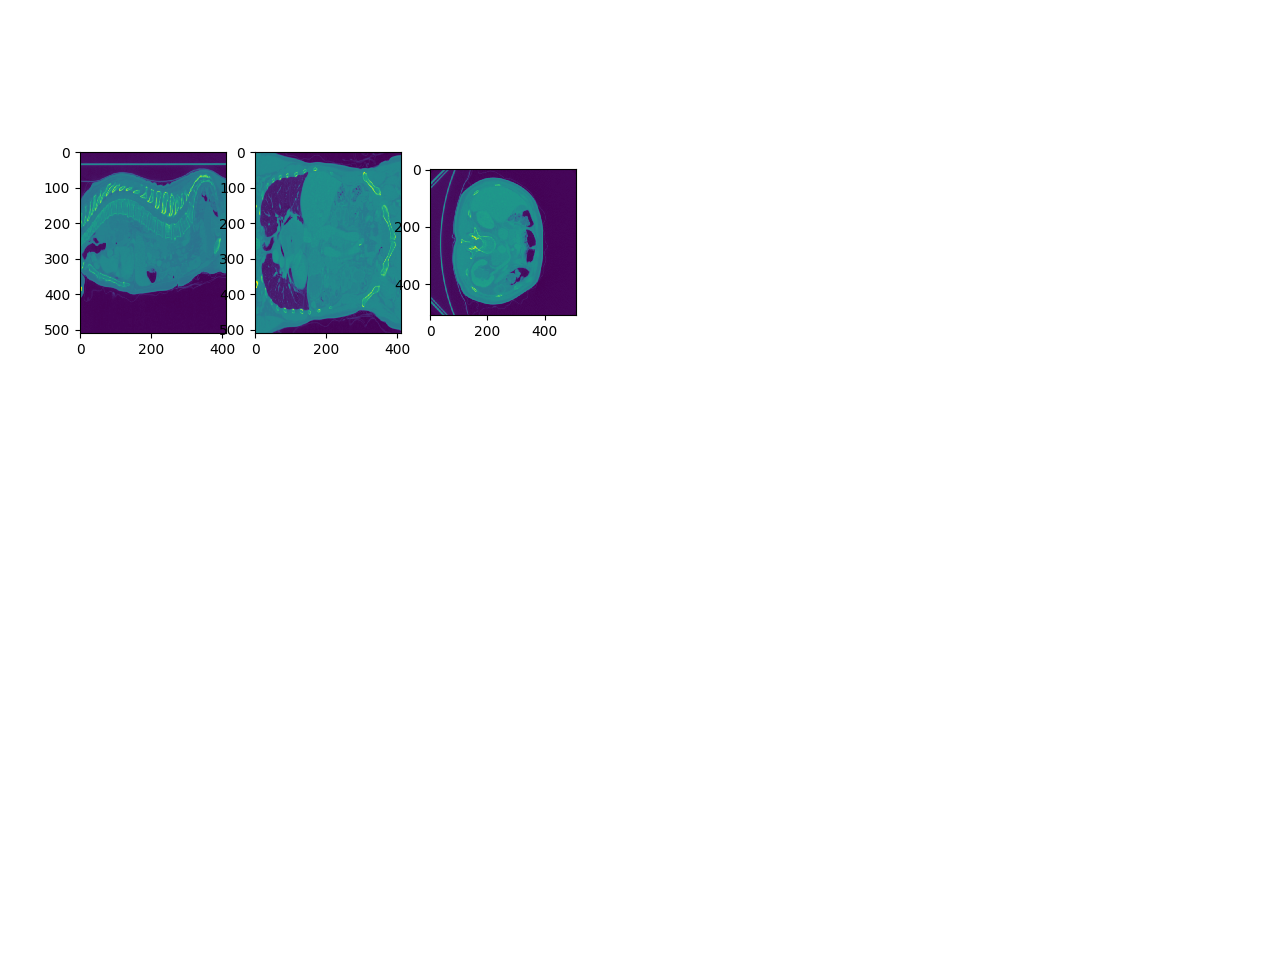

interactive(children=(IntSlider(value=256, description='Sagital', max=512, step=4), Output()), _dom_classes=('…

interactive(children=(IntSlider(value=256, description='Coronal', max=512, step=4), Output()), _dom_classes=('…

interactive(children=(IntSlider(value=206, description='Axial', max=413, step=4), Output()), _dom_classes=('wi…

8888888888888888------888888888888 2021-03-14 01:47:06.733462


<IPython.core.display.Javascript object>


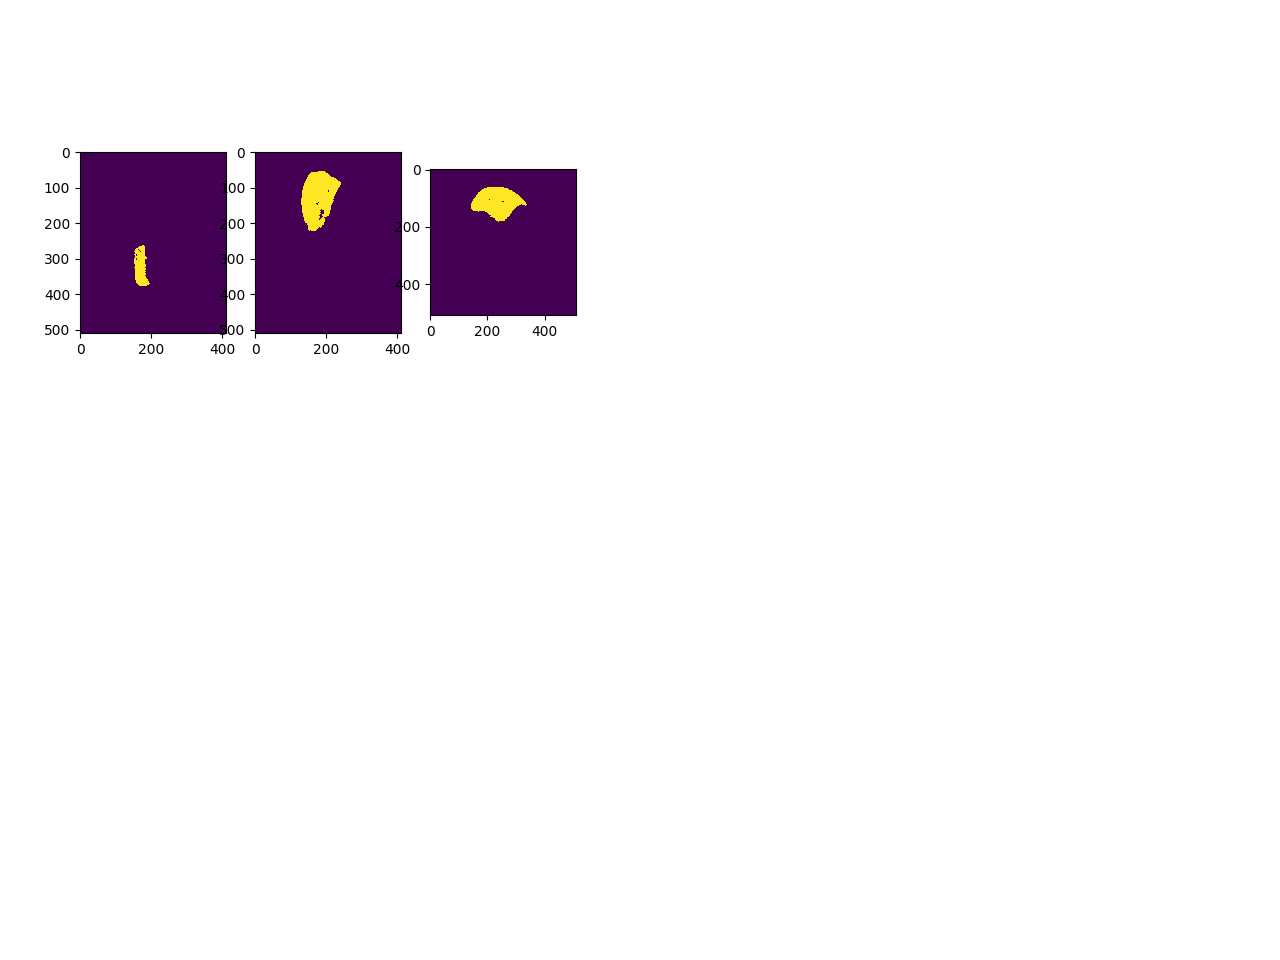

interactive(children=(IntSlider(value=256, description='Sagital', max=512, step=4), Output()), _dom_classes=('…

interactive(children=(IntSlider(value=256, description='Coronal', max=512, step=4), Output()), _dom_classes=('…

interactive(children=(IntSlider(value=206, description='Axial', max=413, step=4), Output()), _dom_classes=('wi…

In [57]:
dir = './../data'
nifti_file = nib.load(os.path.join(dir, 'Case1_CT.nii'))
ct = nifti_file.get_fdata()


# P = Processor()
# liver_seg = P.segmentLiver(
#     os.path.join(dir, 'Case1_CT.nii'),
#     os.path.join(dir, 'Case1_Aorta.nii.gz'),
#     os.path.join(dir, 'out/liver_seg_1.nii.gz'))

gt = nib.load(os.path.join(dir, 'Case1_liver_segmentation.nii.gz')).get_fdata()
# liver_seg = nib.load(os.path.join(dir, 'out/liver_seg_1.nii.gz')).get_fdata()
# print('score---DICE %s --- VOD %s' % P.evaluateSegmentation(gt, liver_seg))

desc = {0: 'Sagital', 1: 'Coronal', 2: 'Axial'}
for vol in [ct, gt]:
    fig = multi_slice_viewer(vol)
    for i in range(3):
        def plot_func_maker(axis):
            global fig
            def plot_func(slice):
                print(slice)
                ax = fig.axes[axis]
                select_slice(ax, slice, axis)
                fig.canvas.draw()
            return plot_func

        interact(plot_func_maker(i), slice=widgets.IntSlider(  value=ct.shape[i]//2,
                                                               min=0,
                                                               max=ct.shape[i],
                                                               step=4,
                                                               description=desc[i]))

